In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable 
import numpy as np
import matplotlib.pyplot as plt

In [51]:


# data I/O
data = open('input.txt', 'r').read() # should be simple plain text file

chars = list(set(data))
print(chars)
data_size, vocab_size = len(data), len(chars)
print("Vocab_ size  {} , Data_size {}".format(vocab_size,data_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

embedding_dim = 100
hidden_dim = 200
seq_len = 20
epochs = 100
itr = data_size//seq_len

['k', 'A', 'a', "'", 'D', 'h', 'l', 'e', 's', 'U', 'f', 'd', 'i', 'W', 'n', 'u', 'T', 'o', 'm', 'S', 'r', 'w', 'g', 'v', 'B', 'b', 'I', 't', ' ', 'N', 'c', 'q', 'y', 'Y', ',', 'L', '\n', 'p']
Vocab_ size  38 , Data_size 1504


In [52]:
class Rnn(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size,seq_len):
        super(Rnn, self).__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.LSTM = nn.LSTM(embedding_dim, hidden_dim)
        self.linear1 = nn.Linear(hidden_dim, vocab_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_dim),
                torch.zeros(1, 1, self.hidden_dim))

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        rnn_out, self.hidden = self.LSTM(embeds.view(self.seq_len,1,-1),self.hidden)
        score  = self.linear1(rnn_out.view(self.seq_len,-1))
        score  = score.view(self.seq_len,-1)
        return score
    
    
        

In [53]:
model = Rnn(embedding_dim,hidden_dim,vocab_size,seq_len)
criterion  = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)



loss at epoch 0 =  2.8309935474395753
loss at epoch 10 =  0.42233004545172054
loss at epoch 20 =  0.10449036900574962
loss at epoch 30 =  0.03620398061349988
loss at epoch 40 =  0.0358557848756512
loss at epoch 50 =  0.018911023746089387
loss at epoch 60 =  0.016405480420216917
loss at epoch 70 =  0.2355194017663598
loss at epoch 80 =  0.017413324792093288
loss at epoch 90 =  0.015276167674843842


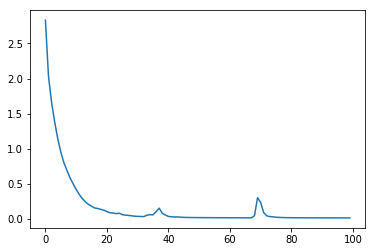

In [54]:
x = []
y = []
for i in range(epochs):
    smooth_loss = 0.0
    x.append(i)
    for k in range(itr):
        inputs = torch.LongTensor(1,seq_len)
        target = torch.LongTensor(seq_len)
        (hidden1,hidden2) = model.hidden
        model.hidden = (hidden1.detach(),hidden2.detach())
        for j in range(seq_len):
            inputs[0][j] = char_to_ix[data[k*seq_len+j]]
            target[j] = char_to_ix[data[k*seq_len+j+1]]
        inputs = Variable(inputs)
        target = Variable(target)
        optimizer.zero_grad()
        score = model.forward(inputs)
        
        losss = criterion(score, target)
        losss.backward()
        optimizer.step()
        smooth_loss=smooth_loss+losss.detach().numpy()
    if(i%10 == 0):
        print("loss at epoch {} =  {}".format(i,smooth_loss/itr))
    y.append(smooth_loss/itr)
plt.plot(x,y)
            
    

In [55]:
def sample(sample_len,start):
    gen_txt = ""
    model.seq_len = 1
    inp = torch.LongTensor([[char_to_ix[data[start]]]])
    for i in range(sample_len):
        score = model.forward(inp)
        y = score.detach().numpy()
        p = np.exp(y) / np.sum(np.exp(y))
        ind = np.random.choice(range(vocab_size), p=p.ravel())
        #ind = np.argmax(score.detach().numpy())
        #print(score.detach().numpy())
        gen_txt+=ix_to_char[ind]
        inp = torch.LongTensor([[ind]])
    print(gen_txt)
         




In [56]:
sample(1000,1)


et you soul
And the saints we see
Are all made of gold

When your dreams all fail
And the ones we hail
Are the worst of all
And the blood's run stale

I wanna hide the truth

No matter what we breed
We still are made of greed
This is my kingdom come
This is my kingdom come
This is my kingdom come
This is my kingdom come
This is my kingdom come
This is my kingdom come

When you feel my heat
Look into my eyes
It's where my demons hide
It's where my demons hide
It's where my demons hide

They say it's what you make
I say it's up to fate
It's woven in my soul
I need to let you go

Your eyes, they shine so bright
I wanna save that light
I can't escape this now
Unless you show me how

When you feel my heat
Look into my eyes
It's where my demons hide
It's where my demons hide
It's where my demons hide
It's where my demons hide
Don't get too close
It's dark inside
It's where my demons hide
Don't get too close
It's dark inside
It's where my demons hide
It's where my demons hide

They say it's w